# Training

In [1]:
import numpy as np  
from keras.models import Sequential
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
np.shape(x_train)

(60000, 28, 28)

In [3]:
from matplotlib import pyplot as plt
plt.imshow(x_train[1])
plt.gray()

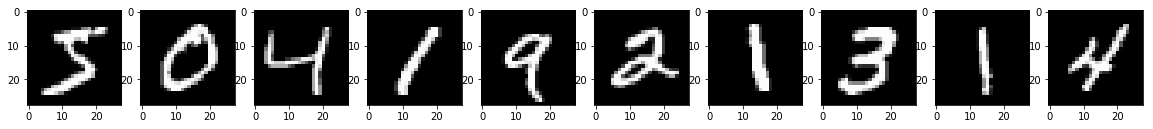

In [4]:
columns = 10
fig = plt.figure(figsize=(20,10))
for i in range(1, columns + 1):
    fig.add_subplot(1, columns, i)
    plt.imshow(x_train[i-1])
plt.gray()

In [5]:
y_train = y_train.astype('float32')/np.max(y_train)
y_train = np.around(y_train, decimals=1)

print np.shape(y_train)
print y_train[:10]

(60000,)
[ 0.60000002  0.          0.40000001  0.1         1.          0.2         0.1
  0.30000001  0.1         0.40000001]


In [6]:
x_train_1D = x_train.reshape(60000, 28*28)
np.shape(x_train_1D)

(60000, 784)

In [7]:
x_train_1D[0][:]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

### [Keras Sequential model](https://keras.io/getting-started/sequential-model-guide/)
1. [Specifying the input shape and NN structure](https://keras.io/getting-started/sequential-model-guide/#specifying-the-input-shape) - create model
 * [layers](https://keras.io/layers/core/)
 * [activations](https://keras.io/activations/#usage-of-activations) - [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function)
2. [Compilation](https://keras.io/getting-started/sequential-model-guide/#compilation) - configures the model for training
 * [loss](https://keras.io/losses/)
 * [optimizer](https://keras.io/optimizers/)
 * [metrics](https://keras.io/metrics/)
3. [fit](https://keras.io/getting-started/sequential-model-guide/#training) - trains the model for a dataset with a fixed number of epochs

In [8]:
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=1, input_shape=(28*28,), activation='sigmoid', name='layer_784x1'))
model.compile(loss='mse', optimizer='SGD', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_784x1 (Dense)          (None, 1)                 785       
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [9]:
train_history = model.fit(x=x_train_1D, y=y_train, batch_size=100, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.1697 - acc: 0.1825
Epoch 2/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.1441 - acc: 0.1835
Epoch 3/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.1406 - acc: 0.1861
Epoch 4/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.1351 - acc: 0.1871
Epoch 5/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.1364 - acc: 0.1862
Epoch 6/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.1323 - acc: 0.1866
Epoch 7/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.1345 - acc: 0.1884
Epoch 8/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.1306 - acc: 0.1865
Epoch 9/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.1303 - acc: 0.1859
Epoch 10/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.1269 - acc: 0.1880

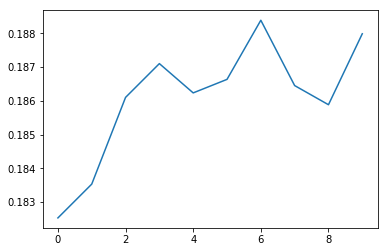

In [10]:
plt.plot(train_history.history['acc'])

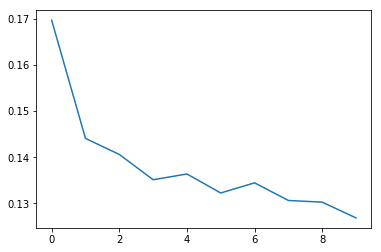

In [11]:
plt.plot(train_history.history['loss'])

# Testing

In [12]:
print x_test.shape
print y_test.shape
y_test = y_test.astype('float32')/np.max(y_test)
y_test = y_test/np.max(y_test)

(10000, 28, 28)
(10000,)


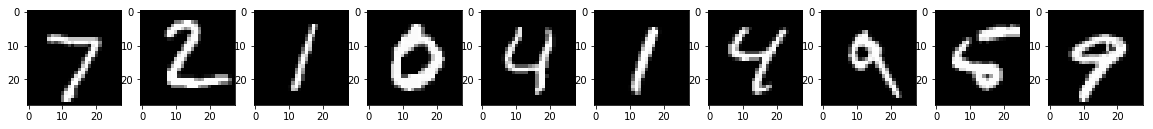

In [13]:
columns = 10
fig = plt.figure(figsize=(20,10))
for i in range(1, columns + 1):
    fig.add_subplot(1, columns, i)
    plt.imshow(x_test[i-1])
plt.gray()

In [14]:
x_test_1D = x_test.reshape(10000, 28*28)
y_pred = model.predict(x_test_1D)
y_pred[:10]

array([[ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.]], dtype=float32)

In [15]:
model.evaluate(x=x_test_1D, y=y_test)

10000/10000 [==============================] - 0s 46us/step


[0.12643160114288329, 0.18720000000000001]